In [1]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('../data/ts_data.csv', parse_dates=['date'], index_col='date')

In [3]:
data.head()

,value
date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869


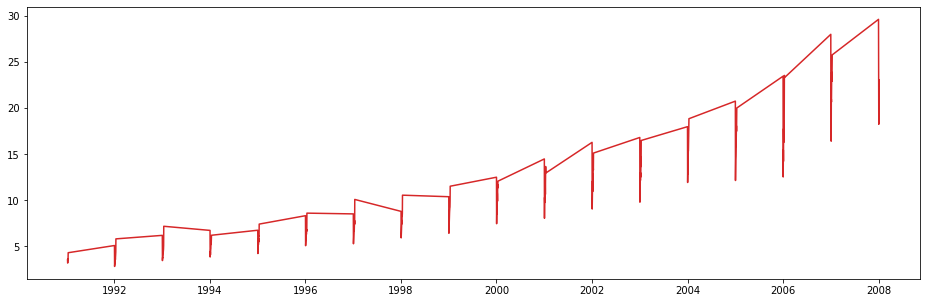

In [4]:
# Draw plot

plt.figure(figsize=(16,5))
plt.plot(data.index, data.value, color='tab:red')
plt.show()

# Seasonal plot of a Time Series

In [10]:
data = pd.read_csv('../data/ts_data_2.csv', parse_dates=['date'])
#data.reset_index(inplace=True)


In [11]:
# prepare data

data['year'] = [d.year for d in data.date]
data['month'] = [d.strftime('%b') for d in data.date]
years = data['year'].unique()


In [12]:
data.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


In [14]:
data

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [15]:
# prep colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

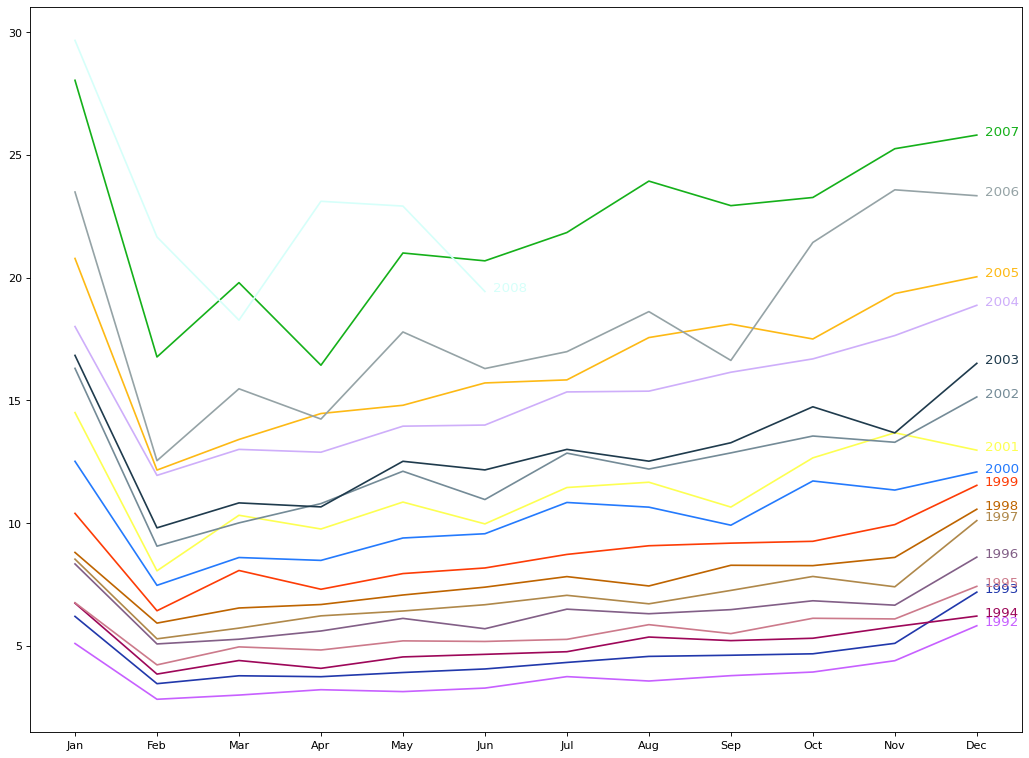

In [17]:
# Draw plot
plt.figure(figsize=(16,12), dpi = 80)
for i, y in enumerate(years):
    if i >0:
        plt.plot('month', 'value', data=data.loc[data.year==y,:], color=mycolors[i],label=y)
        plt.text(data.loc[data.year==y, :].shape[0]-.9, data.loc[data.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

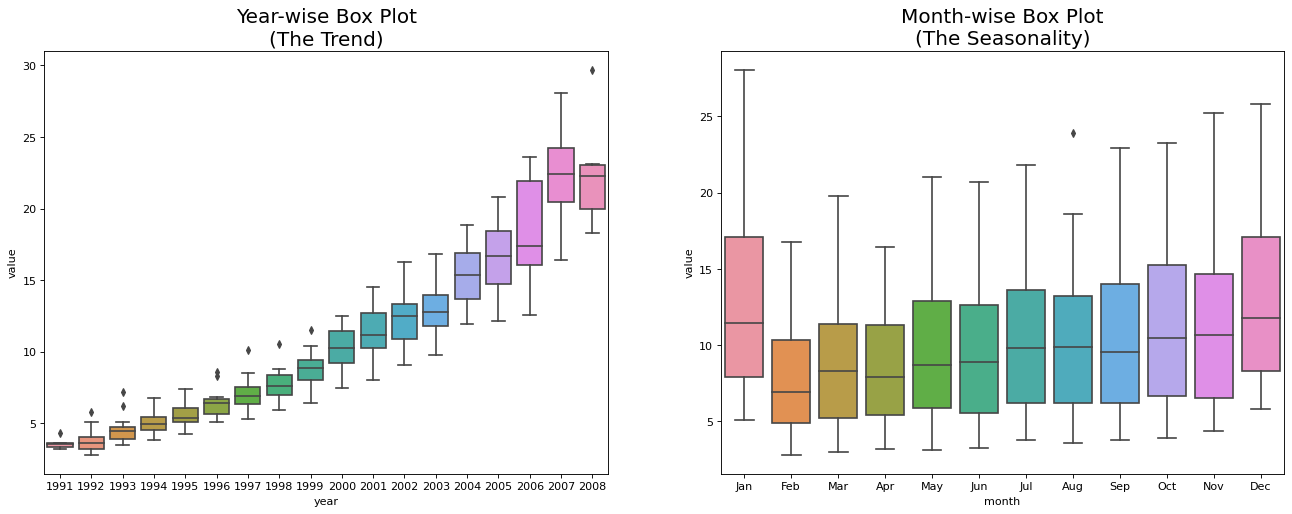

In [18]:
# Import Data
df = pd.read_csv('../data/ts_data_2.csv', parse_dates=['date'])
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## 5. Patterns in a time series

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

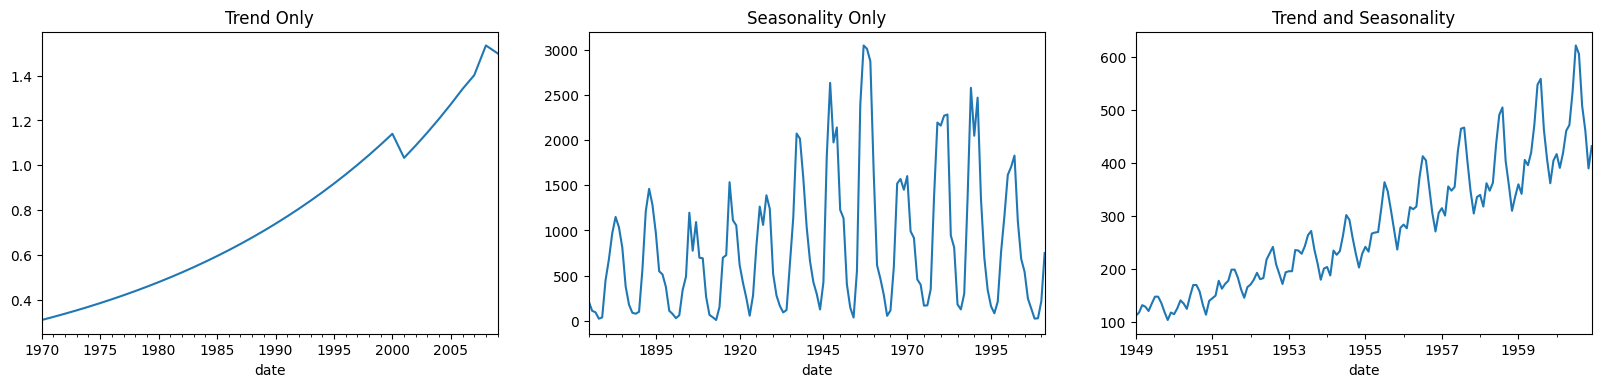

In [19]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

## 6. Additive and multiplicative time series

## 7. How to decompose a time series into its components?

In [ ]:
https://www.machinelearningplus.com/time-series/time-series-analysis-python/